# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [10]:
#import sys
#!{sys.executable} -m pip install palmerpenguins

In [11]:
#import sys
#!{sys.executable} -m pip install scikit-learn --upgrade

In [12]:

import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [13]:
penguins = load_penguins()
penguins.head()
# We need to dummify species, island, and sex


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

#### **Simple Linear Regression Model**


In [14]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

lin_model = LinearRegression()
lin_model.fit(
    X = penguins[["bill_length_mm"]],
    y = penguins["bill_depth_mm"]
)
print(lin_model.intercept_)
print(lin_model.coef_)


20.885468318532755
[-0.08502128]


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

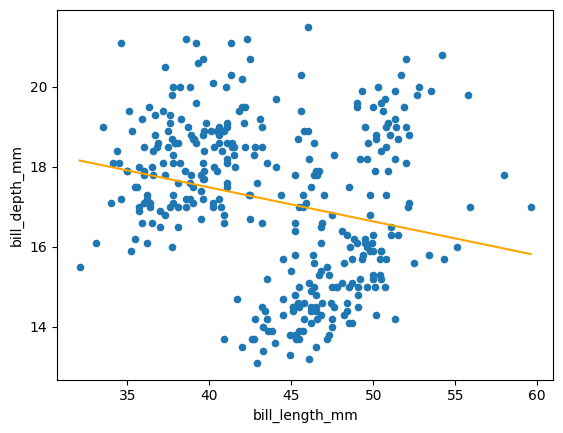

In [15]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(),
                                      penguins["bill_length_mm"].max(),
                                      num=300)

y_new_ = pd.Series(
    lin_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="orange")

#### **Quadratic Model**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

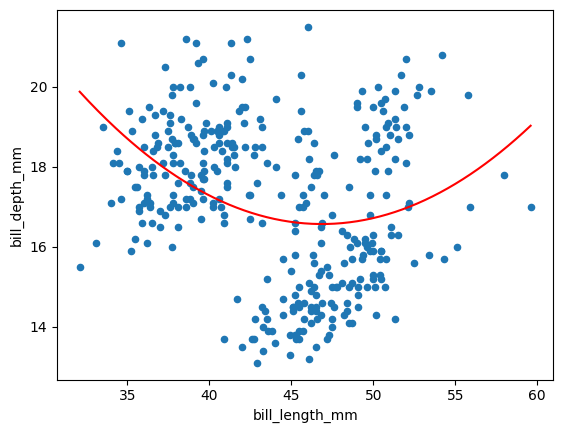

In [16]:
penguins["bill_length_sq"] = penguins["bill_length_mm"] ** 2

quad_model = LinearRegression()
quad_model.fit(
    X = penguins[["bill_length_mm", "bill_length_sq"]],
    y = penguins["bill_depth_mm"]
)

X_new["bill_length_sq"] = X_new["bill_length_mm"] ** 2
y_new_ = pd.Series(
    quad_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="red")


#### **Cubic Model**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

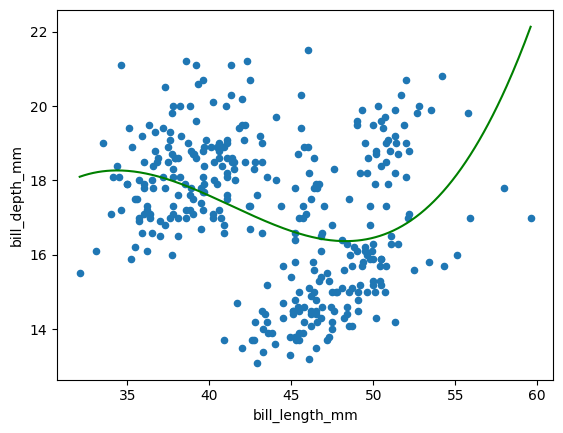

In [17]:
penguins["bill_length_cu"] = penguins["bill_length_mm"] ** 3

cubic_model = LinearRegression()
cubic_model.fit(
    X = penguins[["bill_length_mm", "bill_length_sq", "bill_length_cu"]],
    y = penguins["bill_depth_mm"]
)

X_new["bill_length_cu"] = X_new["bill_length_mm"] ** 3
y_new_ = pd.Series(
    cubic_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="green")

#### **Degree 10 Polynomial**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

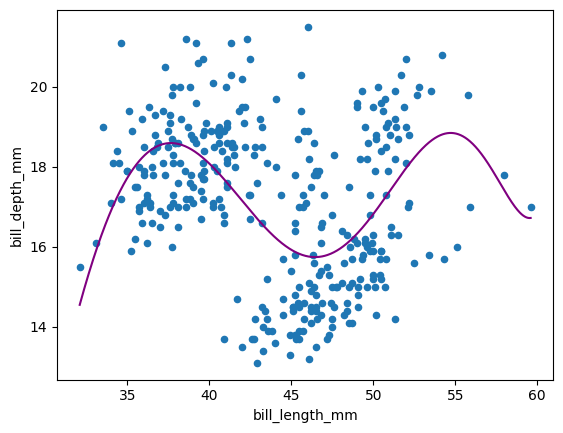

In [ ]:
penguins = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"])

X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]

poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

poly10_model = LinearRegression()
poly10_model.fit(X_poly, y)

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(X.min().values[0], X.max().values[0], 1000)

X_new_poly = poly.transform(X_new)

y_new_ = pd.Series(
    poly10_model.predict(X_new_poly),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c="purple")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is underfitting because it’s too simple and misses the curved pattern in the data.
The degree 10 model is overfitting because it bends too much and follows random noise.
The quadratic or cubic model fits the data best because it captures the main trend without being too wiggly.